# Payoff and profit/loss functions for the call and put options

In [2]:
def payoff_call(St, X):
    return (St - X + abs(St - X)) / 2

In [5]:
#trial

payoff = payoff_call(80, 100)

In [6]:
payoff

0.0

if the stock prices is an array, then we can also the above code:

In [14]:
import numpy as np
import matplotlib.pyplot as plt
X = 20
St = np.arange(10,50,10)
payoff = payoff_call(St, X)

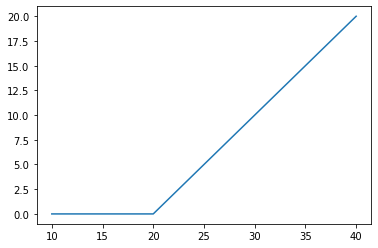

In [15]:
payoff
plt.plot(St, payoff)

In [19]:
# Call option buyer profit
def call_buyer_profit(St, X, c):
    payoff = payoff_call(St, X)
    return payoff - c

# Call option seller profit
def call_seller_profit(St, X, c):
    payoff = payoff_call(St, X)
    return c - payoff

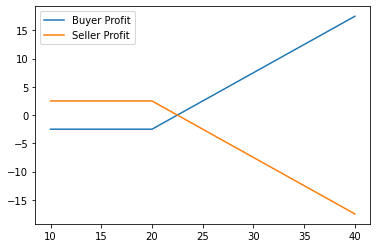

In [24]:
St = np.arange(10, 50, 10)
X = 20
c = 2.50

buyer_profit = call_buyer_profit(St, X, c)
seller_profit = call_seller_profit(St, X, c)

plt.plot(St, buyer_profit)
plt.plot(St, seller_profit)
plt.legend(['Buyer Profit', 'Seller Profit'])


In [25]:
def payoff_put(St, X):
    return (abs(X - St) + X - St) / 2

In [28]:
payoff = payoff_put(110, 100)

In [30]:
def put_buyer_profit(St, X, p):
    put_payoff = payoff_put(St, X)
    return put_payoff - p

def put_seller_profit(St, X, p):
    put_payoff = payoff_put(St, X)
    return p - put_payoff

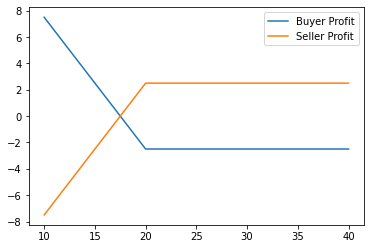

In [31]:
St = np.arange(10, 50, 10)
X = 20
p = 2.50

buyer_profit = put_buyer_profit(St, X, p)
seller_profit = put_seller_profit(St, X, p)

plt.plot(St, buyer_profit)
plt.plot(St, seller_profit)
plt.legend(['Buyer Profit', 'Seller Profit'])

# Normal Distribution

In [40]:
from scipy import exp, stats
#stats.norm.pdf(0)
1/np.sqrt(2 * np.pi)

0.3989422804014327

In [41]:
stats.norm.pdf(0, 0.1, 0.05)

1.079819330263761

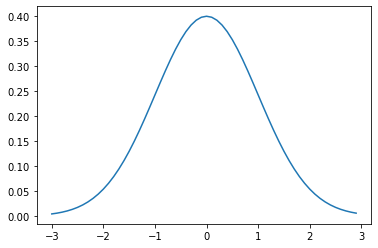

In [46]:
#drawing the normal distribution pdf

x = np.arange(-3, 3, 0.1)
y = stats.norm.pdf(x)
plt.plot(x, y)

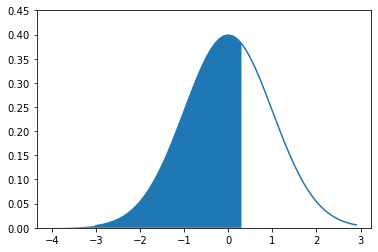

In [72]:
#Can we insert shading?
z = 0.325
def f(t):
    return stats.norm.pdf(t)

plt.ylim(0, 0.45)
x = np.arange(-3, 3, 0.1)
y1 = f(x)
plt.plot(x, y1)
x2 = np.arange(-4, z, 1/40.)
sum = 0
delta = 0.05
s = np.arange(-10, z, delta)
for i in s:
    sum+=f(i)*delta
plt.fill_between(x2, f(x2))

# BS Option pricing non-dividend stock

$$d_1 = \frac{\ln{\frac{S_0}{x}} + (\gamma + 0.5 \sigma^2)T}{\sigma \sqrt{T}}$$

$$d_2 = \frac{\ln{\frac{S_0}{x}} + (\gamma - 0.5 \sigma^2) T}{\sigma \sqrt{T}} = d_1 - \sigma \sqrt{T} $$

$$c = S_0 \mathcal{N}(d_1) - X e^{-\gamma T} \mathcal{N} (d_2) $$

$$p = X e^{-\gamma T} \mathcal{N} (-d_2) - S_0 \mathcal{N} (-d_1) $$

In [74]:
import blackscholes as bs

In [75]:
%load_ext autoreload
%autoreload 2

In [79]:
c = bs.bs_call(40, 42, 0.5, 0.015, 0.2)

In [81]:
round(c, 2)

1.56

In [82]:
bs.bs_put(40, 38, 0.5, 0.015, 0.2)

1.234774729989594

In [83]:
import networkx as nx

In [84]:
def binomial_grid(n):
    G = nx.Graph()
    for i in range(0, n+1):
        for j in range(1, i+2):
            if i<n:
                G.add_edge((i, j), (i+1, j))
                G.add_edge((i, j), (i+1, j+1))
    posG = {}
    for node in G.nodes():
        posG[node] = (node[0], n+2+node[0] - 2 * node[1])
    nx.draw(G, pos = posG)